In [46]:
#%load_ext autoreload
#%autoreload 2

library(Seurat)
# cowplot enables side-by-side ggplots
library(cowplot)
library(dplyr)
library(annotables)
library(UpSetR)

source("tooling_scripts/seurat.R")

dir.in <- "/home/pesho/repos/bioviz/in/clonality_tables/"
dir.out <- "/home/pesho/repos/bioviz/out/seurat/"

In [47]:
gene.sets <- ReadGenesets("/home/pesho/repos/bioviz/seurat/filtered/", recursive=TRUE)
gene.sets[["Park"]] <- Park.genes

 [1] "DE_bimod_FrK_BL"     "DE_bimod_FrK_SE"     "DE_bimod_FrK_SL"    
 [4] "DE_bimod_SchH_SE"    "DE_bimod_SchH_SL"    "DE_bimod_WaG_BL-C"  
 [7] "DE_bimod_WaG_SE"     "DE_DESeq2_FrK_BL"    "DE_DESeq2_FrK_SE"   
[10] "DE_DESeq2_FrK_SL"    "DE_DESeq2_SchH_SE"   "DE_DESeq2_SchH_SL"  
[13] "DE_DESeq2_WaG_BL-C"  "DE_DESeq2_WaG_SE"    "DE_poisson_FrK_BL"  
[16] "DE_poisson_FrK_SE"   "DE_poisson_FrK_SL"   "DE_poisson_SchH_SE" 
[19] "DE_poisson_SchH_SL"  "DE_poisson_WaG_BL-C" "DE_poisson_WaG_SE"  
[22] "DE_t_FrK_BL"         "DE_t_FrK_SE"         "DE_t_FrK_SL"        
[25] "DE_t_SchH_SE"        "DE_t_SchH_SL"        "DE_t_WaG_SE"        
[28] "DE_tobit_FrK_BL"     "DE_tobit_FrK_SE"     "DE_tobit_FrK_SL"    
[31] "DE_tobit_SchH_SE"    "DE_tobit_SchH_SL"    "DE_tobit_WaG_BL-C"  
[34] "DE_tobit_WaG_SE"     "DE_wilcox_FrK_BL"    "DE_wilcox_FrK_SE"   
[37] "DE_wilcox_FrK_SL"    "DE_wilcox_SchH_SE"   "DE_wilcox_WaG_SE"   


In [48]:
source("tooling_scripts/seurat.R")
gene.sets.filtered <- list()
for (name in names(gene.sets)) {
    gene.sets.filtered[[name]] <- FilterOutTCRGenes(gene.sets[[name]])
}

352 -> 347 , 341 -> 335 , 613 -> 598 , 323 -> 318 , 318 -> 315 , 420 -> 417 , 31 -> 28 , 65 -> 62 , 57 -> 55 , 299 -> 293 , 39 -> 37 , 103 -> 102 , 20 -> 19 , 9 -> 7 , 2287 -> 2266 , 2352 -> 2319 , 2672 -> 2637 , 2480 -> 2460 , 2739 -> 2719 , 2994 -> 2973 , 801 -> 792 , 10 -> 8 , 198 -> 197 , 74 -> 71 , 3 -> 2 , 2 -> 1 , 9 -> 7 , 13 -> 11 , 6 -> 6 , 54 -> 51 , 5 -> 5 , 3 -> 3 , 2 -> 2 , 7 -> 5 , 8 -> 6 , 5 -> 3 , 97 -> 94 , 2 -> 1 , 6 -> 4 , 55 -> 55 , 

_DESeq2_|Park 593 8 
[1] "DE_DESeq2_FrK_BL"   "DE_DESeq2_FrK_SE"   "DE_DESeq2_FrK_SL"  
[4] "DE_DESeq2_SchH_SE"  "DE_DESeq2_SchH_SL"  "DE_DESeq2_WaG_BL-C"
[7] "DE_DESeq2_WaG_SE"   "Park"              
_t_|Park 329 7 
[1] "DE_t_FrK_BL"  "DE_t_FrK_SE"  "DE_t_FrK_SL"  "DE_t_SchH_SE" "DE_t_SchH_SL"
[6] "DE_t_WaG_SE"  "Park"        


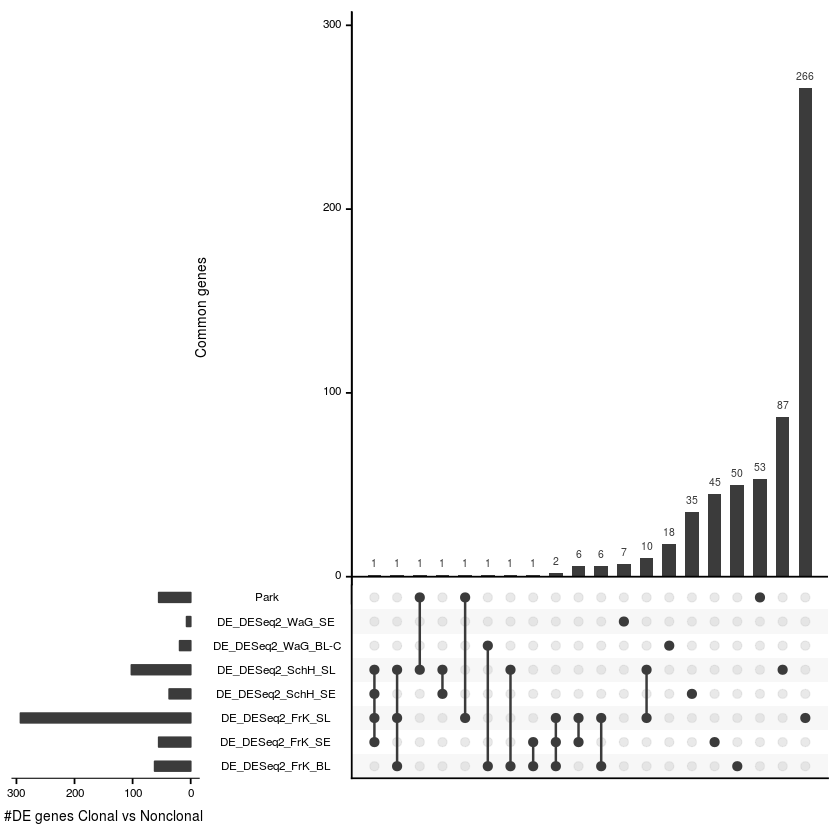

_bimod_|Park 2090 8 
[1] "DE_bimod_FrK_BL"   "DE_bimod_FrK_SE"   "DE_bimod_FrK_SL"  
[4] "DE_bimod_SchH_SE"  "DE_bimod_SchH_SL"  "DE_bimod_WaG_BL-C"
[7] "DE_bimod_WaG_SE"   "Park"             


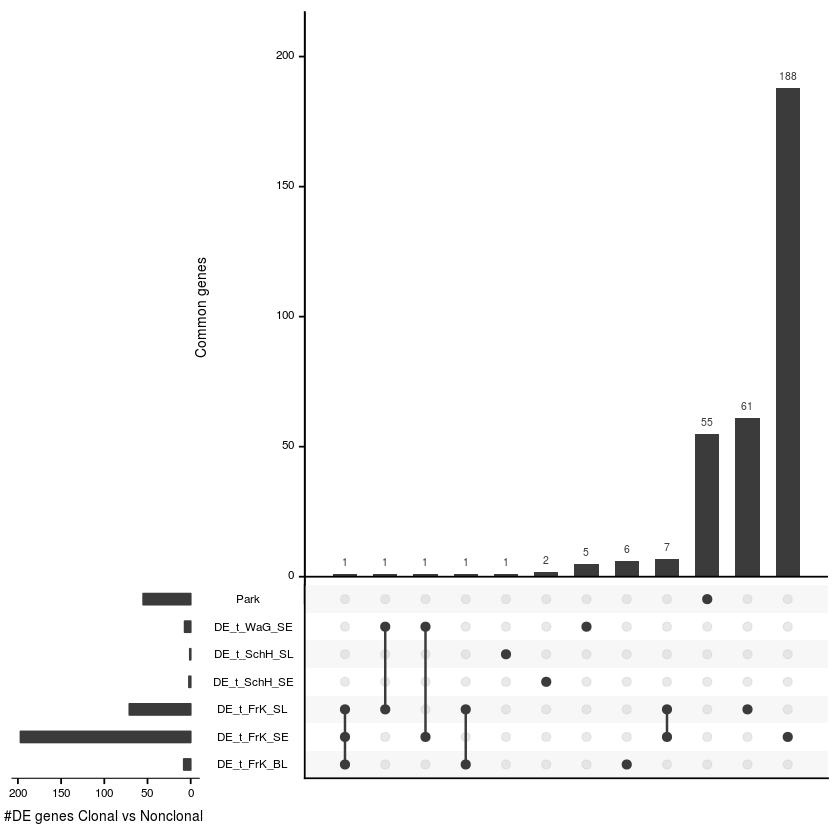

_tobit_|Park 136 8 
[1] "DE_tobit_FrK_BL"   "DE_tobit_FrK_SE"   "DE_tobit_FrK_SL"  
[4] "DE_tobit_SchH_SE"  "DE_tobit_SchH_SL"  "DE_tobit_WaG_BL-C"
[7] "DE_tobit_WaG_SE"   "Park"             


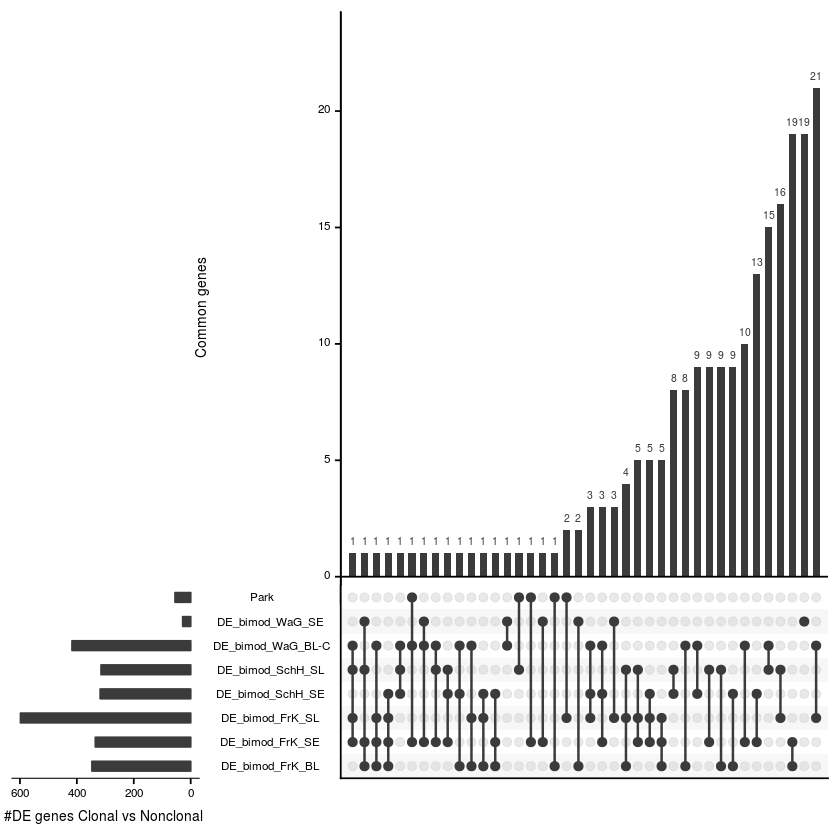

_wilcox_|Park 160 6 
[1] "DE_wilcox_FrK_BL"  "DE_wilcox_FrK_SE"  "DE_wilcox_FrK_SL" 
[4] "DE_wilcox_SchH_SE" "DE_wilcox_WaG_SE"  "Park"             


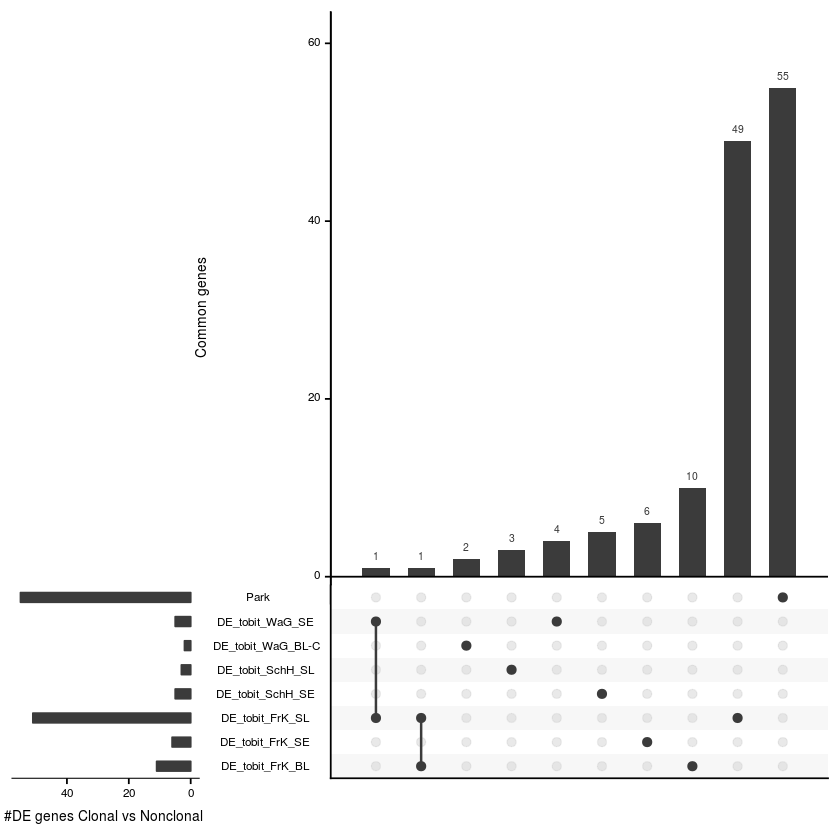

poisson|Park 7155 8 
[1] "DE_poisson_FrK_BL"   "DE_poisson_FrK_SE"   "DE_poisson_FrK_SL"  
[4] "DE_poisson_SchH_SE"  "DE_poisson_SchH_SL"  "DE_poisson_WaG_BL-C"
[7] "DE_poisson_WaG_SE"   "Park"               


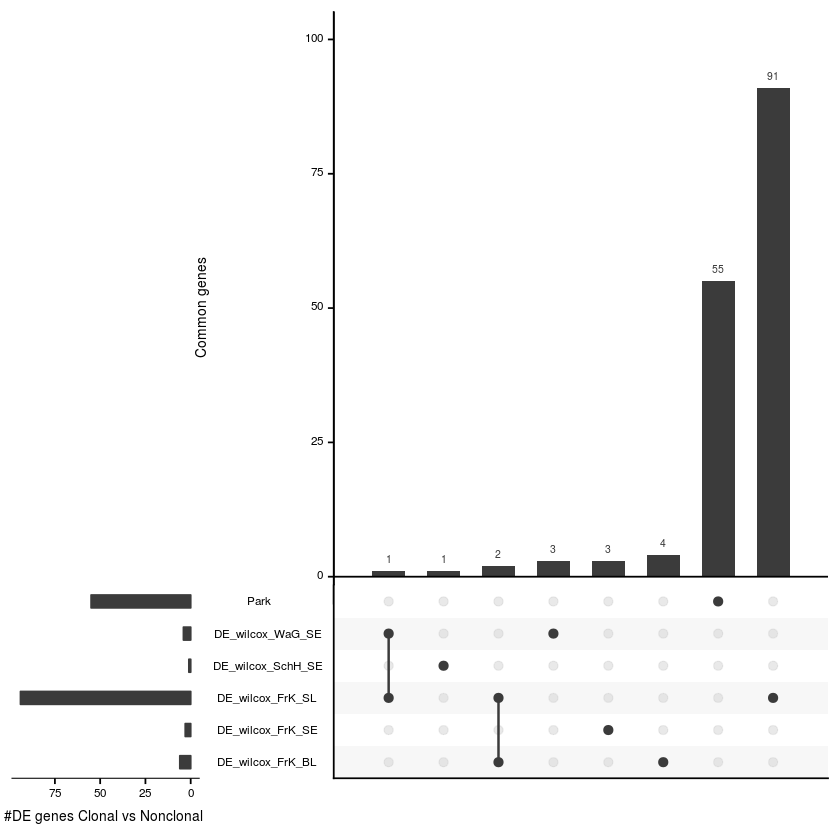

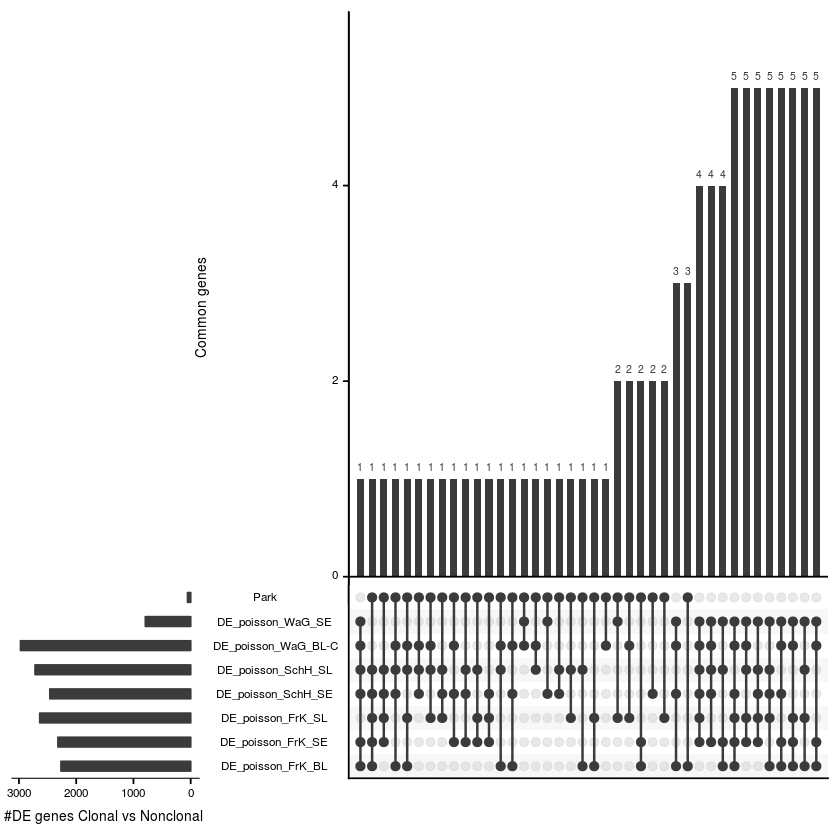

In [50]:
source("tooling_scripts/seurat.R")
tests <- c("_DESeq2_", "_t_", "_bimod_", "_tobit_", "_wilcox_", "poisson") # "poisson",  # crash!
#tests <- c("poisson")
tests.and.park <- paste(tests, "|Park", sep="")
SubsetAndUpset(gene.sets.filtered, regexps = tests.and.park)

#batches <- batches.good
#batches.and.park <- paste(batches, "|Park", sep="")
#SubsetAndUpset(gene.sets.filtered, regexps = batches.and.park)

In [60]:
source("tooling_scripts/seurat.R")
batch.names <- c("FrK_SE", "WaG_BL-C") #SchH.good
batches <- ReadBatches(batch.names, dir.in, dir.out)
batches <- FilterCellsInBatches(batches, dir.out, nGene.limits, nUMI.limits, percent.mito.limits)
RunOnAllBatches(batches, de.tests="wilcox", name="Parkgenes", genes.use=Park.genes, dir.out=dir.out)

[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/FrK_SE_clonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

116024 transcripts -> 24447 genes 
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/FrK_SE_nonclonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

116024 transcripts -> 24447 genes 
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/FrK_SE_nonreconstructed.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

116024 transcripts -> 24447 genes 


Saving 6.67 x 6.67 in image


An object of class seurat in project FrK_SE 
 24447 genes across 68 samples.
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/WaG_BL-C_clonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

97913 transcripts -> 24044 genes 
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/WaG_BL-C_nonclonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

97913 transcripts -> 24044 genes 
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/WaG_BL-C_nonreconstructed.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

97913 transcripts -> 24044 genes 


Saving 6.67 x 6.67 in image


An object of class seurat in project WaG_BL-C 
 24044 genes across 66 samples.
An object of class seurat in project FrK_SE 
 24447 genes across 68 samples.


Saving 6.67 x 6.67 in image


An object of class seurat in project WaG_BL-C 
 24044 genes across 66 samples.


Saving 6.67 x 6.67 in image


[1] "wilcox on FrK_SE..."
4  genes to be plot.
Writing violins:  /home/pesho/repos/bioviz/out/seurat/violins_Parkgenes_FrK_SE.png 


Saving 6.67 x 6.67 in image


[1] "wilcox on WaG_BL-C..."
5  genes to be plot.
Writing violins:  /home/pesho/repos/bioviz/out/seurat/violins_Parkgenes_WaG_BL-C.png 


Saving 6.67 x 6.67 in image


[1] "PC1"
 [1] "CEP83"    "CEACAM21" "TUBD1"    "CDK8"     "CBFA2T2"  "TRAJ23"  
 [7] "LRIG2"    "USP40"    "OTUD5"    "ZMYM1"    "APPL2"    "CXCR3"   
[13] "GTPBP1"   "FXYD7"    "DPEP2"    "TXK"      "POLR3F"   "ZNF268"  
[19] "CD8B"     "GBAP1"    "BIN1"     "RNF11"    "C15orf53" "KDM6A"   
[25] "WAC"      "KLHDC10"  "PCK2"     "SRGAP2"   "TRAV4"    "ZNF639"  
[1] ""
 [1] "HPGDS"    "SAT1"     "IL17RB"   "TREX1"    "SLC25A5"  "MT-ND1"  
 [7] "MT-ND2"   "ACTG1"    "ARHGDIA"  "HMGB2"    "SNRNP25"  "ACSL5"   
[13] "CKS2"     "TXN2"     "H2AFV"    "CIAO1"    "VPS25"    "CCDC167" 
[19] "ERN1"     "EBP"      "LMNA"     "PTPN6"    "PNN"      "LUZP6"   
[25] "GPI"      "AKAP8"    "TUBA1B"   "PDS5B"    "PCNA"     "TMEM167A"
[1] ""
[1] ""
[1] "PC2"
 [1] "CYP4B1"     "RRP7BP"     "NCAPH2"     "SRCAP"      "FAM129B"   
 [6] "AC135983.2" "C14orf80"   "TMEM63A"    "UBAC1"      "CLU"       
[11] "HERC2P4"    "SPNS3"      "RNF19A"     "PTGES3P2"   "MSH3"      
[16] "TCIRG1"     "SNX19"      "ENTPD5"

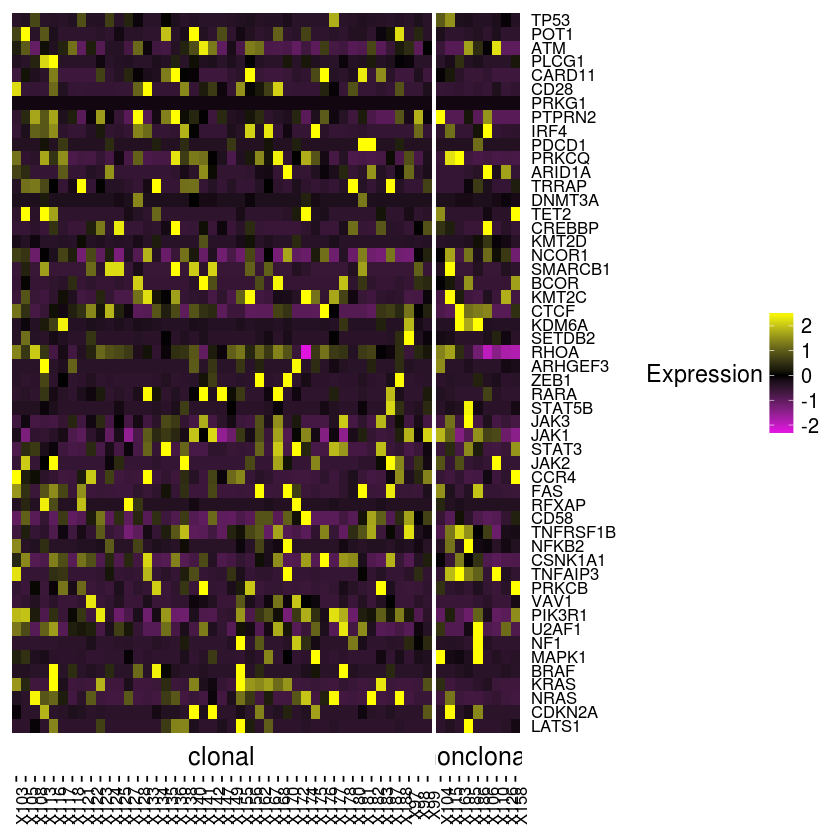

In [68]:
batch <- batches[[1]]
batch <- RunPCA(batch)
#PCTopCells(batch)
DoHeatmap(batch, genes.use=Park.genes)

In [52]:
#require(VennDiagram)
#diagram <- venn.diagram(list(B = 1:1800, A = 1571:2020),fill = c("red", "green"),
#  alpha = c(0.5, 0.5), cex = 2,cat.fontface = 4,lty =2, fontfamily =3, 
#  filename = "trial2.emf");
#plot(diagram)

#library(eulerr)
#fit <- euler(c(A = 450, B = 1800, "A&B" = 230))
#plot(fit, fill_opacity = 0.3)

#require(gplots) 
### construct some fake gene names..
#oneName <- function() paste(sample(LETTERS,5,replace=TRUE),collapse="")
#geneNames <- replicate(1000, oneName())
#
### 
#GroupA <- sample(geneNames, 400, replace=FALSE)
#GroupB <- sample(geneNames, 750, replace=FALSE)
#GroupC <- sample(geneNames, 250, replace=FALSE)
#GroupD <- sample(geneNames, 300, replace=FALSE)
#GroupE <- sample(geneNames, 300, replace=FALSE)
#GroupF <- sample(geneNames, 300, replace=FALSE)
#
#venn(list(GrpA=GroupA,GrpB=GroupB,GrpC=GroupC,GrpD=GroupD,GrpE=GroupE,GrpF=GroupF))

#batch.names <- c('SchH_SE', 'SchH_SL', 'WaG_BL-C', 'WaG_SE', 'FrK_BL', 'FrK_SE', 'FrK_SL')  # 'SchH_BE', WaG_BE, WaG_BL excluded, 'WaG_SL', 
#batch.names <- c("SchH_SE", "SchH_SL")

#batches <- c()
#for (batch.name in batch.names) {
#    batches <- c(batches, ReadBatch(dir_in, dir_out, batch.name))
#}
#batches

SchH_skin <- read_early_late_clonal(dir.in, dir.out, "SchH_SE", "SchH_SL")

[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/SchH_SE_clonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

98719 transcripts -> 21181 genes 
[1] "Reading /home/pesho/repos/bioviz/in/clonality_tables/SchH_SL_clonal.csv..."


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

72115 transcripts -> 17981 genes 
[1] "early" "late" 


ERROR: Error in SetIdent(batch, cells.use = WhichCells(object = early.cl), id = "early"): ERROR : Cannot find cells  X103ERROR : Cannot find cells  X106ERROR : Cannot find cells  X113ERROR : Cannot find cells  X115ERROR : Cannot find cells  X118ERROR : Cannot find cells  X122ERROR : Cannot find cells  X125ERROR : Cannot find cells  X134ERROR : Cannot find cells  X136ERROR : Cannot find cells  X137ERROR : Cannot find cells  X141ERROR : Cannot find cells  X145ERROR : Cannot find cells  X146ERROR : Cannot find cells  X156ERROR : Cannot find cells  X161ERROR : Cannot find cells  X164ERROR : Cannot find cells  X176ERROR : Cannot find cells  X177ERROR : Cannot find cells  X178ERROR : Cannot find cells  X180ERROR : Cannot find cells  X182ERROR : Cannot find cells  X185ERROR : Cannot find cells  X97


In [19]:
#early <- RenameIdent(object = batches[[1]], old.ident.name = "clonal", new.ident.name = "early_clonal")
#late <- RenameIdent(object = batches[[2]], old.ident.name = "clonal", new.ident.name = "late_clonal")
#SchH_skin <- MergeSeurat(object1 = early, object2 = late, add.cell.id1="early", add.cell.id2="late", project = "SchH_skin")
#SchH_skin <- MergeSeurat(object1 = early, object2 = late, add.cell.id1="early", add.cell.id2="late", project = "SchH_skin")
DE(SchH_skin, "wilcox", "early", "late")